In [64]:
import nibabel as nib
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
def load_nifti_image(file_path):
    img = nib.load(file_path)
    img_data = img.get_fdata()
    return img_data

In [31]:
img_test = load_nifti_image('./train/site1-sc01-image.nii.gz')

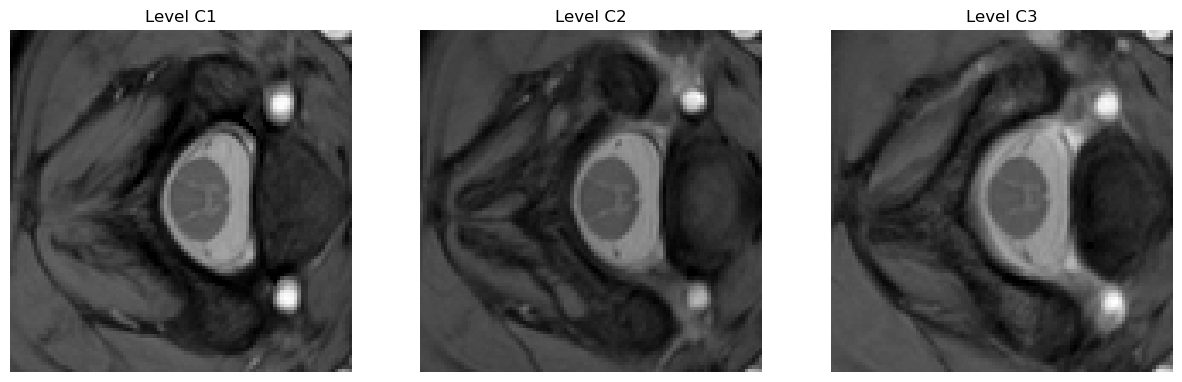

In [32]:
plt.figure(figsize=(15,6))
for k in range(3):
    plt.subplot(1,3,k+1)
    plt.imshow(img_test[:,:,k], cmap='gray')
    plt.axis('off')
    plt.title(f'Level C{k+1}')

In [45]:
mask_test = load_nifti_image('./train/site1-sc01-mask-r1.nii.gz')

In [46]:
mask_test.shape

(100, 100, 3)

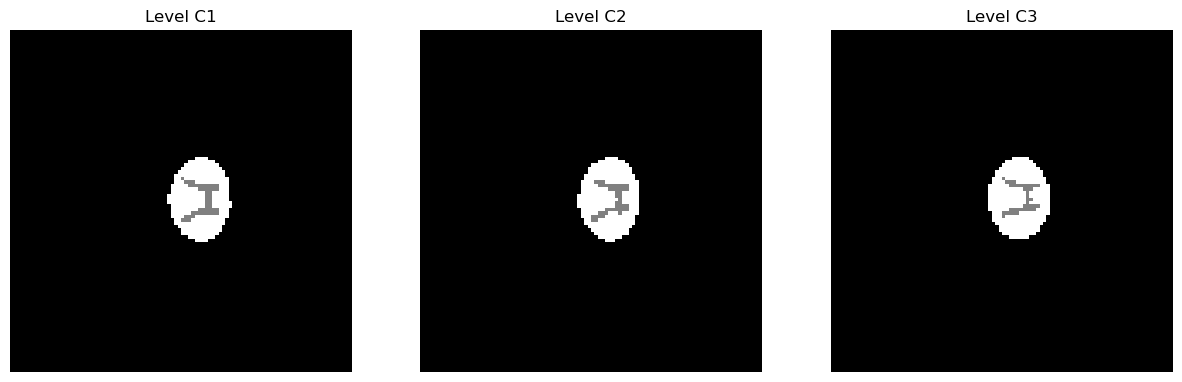

In [47]:
plt.figure(figsize=(15,6))
for k in range(3):
    plt.subplot(1,3,k+1)
    plt.imshow(mask_test[:,:,k], cmap='gray')
    plt.axis('off')
    plt.title(f'Level C{k+1}')

In [71]:
def convert_mask_into_gray_matter(mask):
    segmented_mask = np.zeros(mask.shape)
    for x in range(mask.shape[0]):
        for y in range(mask.shape[1]):
            if mask[x,y] == 1:
                segmented_mask[x,y] = 1
            else:
                segmented_mask[x,y] = 0
    return segmented_mask

In [72]:
mask = convert_mask_into_gray_matter(mask_test[:,:,0])

(-0.5, 99.5, 99.5, -0.5)

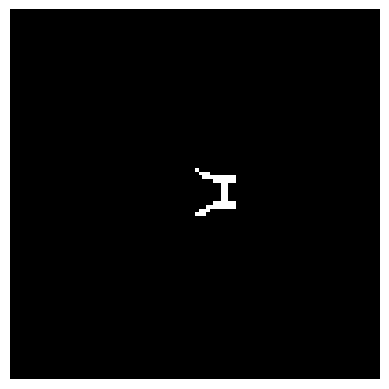

In [73]:
plt.imshow(mask, cmap='gray')
plt.axis('off')

In [78]:
def display_image_and_its_mask(img, mask):
    img_normalized = np.copy(img) / np.max(img)
    img_with_mask = np.copy(img_normalized)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if mask[x,y]==1:
                img_with_mask[x,y]=1
            else:
                pass
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(img_normalized, cmap='gray')
    plt.axis('off')
    plt.title('Base image')

    plt.subplot(1,2,2)
    plt.imshow(img_with_mask, cmap='gray')
    plt.axis('off')
    plt.title('Image with mask')

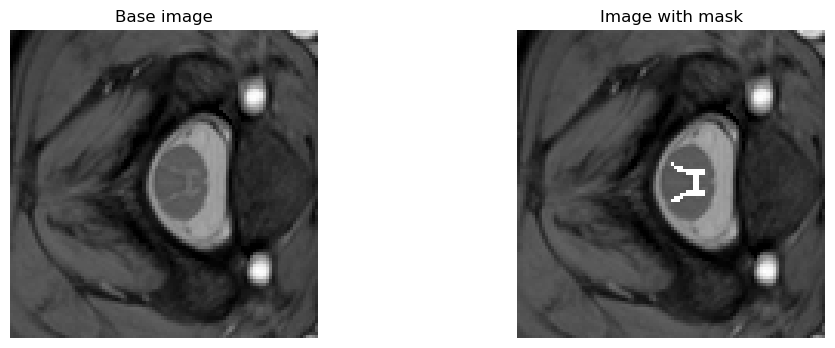

In [84]:
display_image_and_its_mask(img_test[:,:,0], mask)